## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df_data = pd.read_csv('assets/real_estate.csv',sep=';',index_col=0)
display(df_data.head(10))


,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28T18:27:15.9975027Z,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
6,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,2019-12-28T18:27:15.9680547Z,...,0,0,0,0,0,0,"40,53391","-3,89445",NaN,NaN
7,153848236,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,145.0,430000,2019-12-28T18:27:15.9680547Z,...,0,0,0,0,0,0,"40,5105842135624","-3,89436578643763",NaN,NaN
8,153482331,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,95.0,275000,2019-12-28T18:27:15.9680547Z,...,0,0,0,0,0,0,"40,53294","-3,89898",NaN,NaN
9,153885351,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,3.0,277.0,445000,2019-12-28T18:27:15.9680547Z,...,0,0,0,0,0,0,"40,5363057864376","-3,89294421356237",NaN,NaN
10,153215459,False,modesta,NaN,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,129.0,350000,2019-12-28T13:30:00Z,...,0,0,0,0,0,0,"40,37502","-3,74391",NaN,NaN


In [3]:
print(df_data.info())
pd.options.display.float_format = '{:,.2f}'.format
display(df_data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15335 entries, 1 to 15335
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_realEstates    15335 non-null  int64  
 1   isNew             15335 non-null  bool   
 2   realEstate_name   15325 non-null  object 
 3   phone_realEstate  14541 non-null  float64
 4   url_inmueble      15335 non-null  object 
 5   rooms             14982 non-null  float64
 6   bathrooms         14990 non-null  float64
 7   surface           14085 non-null  float64
 8   price             15335 non-null  int64  
 9   date              15335 non-null  object 
 10  description       15193 non-null  object 
 11  address           15335 non-null  object 
 12  country           15335 non-null  object 
 13  level1            15335 non-null  object 
 14  level2            15335 non-null  object 
 15  level3            15335 non-null  object 
 16  level4            8692 non-null   object

,id_realEstates,phone_realEstate,rooms,bathrooms,surface,price,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,zipCode,customZone
count,"15,335.00","14,541.00","14,982.00","14,990.00","14,085.00","15,335.00","15,335.00","15,335.00","15,335.00","15,335.00","15,335.00","15,335.00","15,335.00","15,335.00","15,335.00","15,335.00",0.00,0.00
mean,"152,437,086.66","914,342,269.11",3.23,2.15,196.92,"477,303.57",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.17,NaN,NaN
std,"2,277,285.51","7,516,036.10",1.39,1.29,"2,182.76","591,294.23",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,NaN,NaN
min,"122,158,397.00","876,274,236.00",1.00,1.00,15.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
25%,"151,945,648.50","911,364,937.00",2.00,1.00,80.00,"169,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
50%,"153,241,261.00","912,184,058.00",3.00,2.00,114.00,"280,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
75%,"153,810,509.00","914,890,357.00",4.00,3.00,205.00,"540,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
max,"154,003,339.00","988,776,128.00",30.00,20.00,"249,000.00","8,500,000.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,NaN,NaN


#### What is the most expensive home in the dataset? (★☆☆)

In [33]:
#data - using filter with the max price
display(df_data[df_data["price"]==df_data["price"].max()])
#index - using the index of the max value filter the home
display(df_data[df_data.index==df_data["price"].idxmax()])

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
13111,132042636,False,engel volkers torrelodones,"911,798,512.00",https://www.fotocasa.es/es/comprar/vivienda/vi...,19.00,NaN,NaN,8500000,2019-12-19T12:29:00Z,...,0,0,0,0,0,0,"40,5830801751782","-4,12951942848611",NaN,NaN


,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
13111,132042636,False,engel volkers torrelodones,"911,798,512.00",https://www.fotocasa.es/es/comprar/vivienda/vi...,19.00,NaN,NaN,8500000,2019-12-19T12:29:00Z,...,0,0,0,0,0,0,"40,5830801751782","-4,12951942848611",NaN,NaN


#### What is cheapest home in the dataset? (★☆☆)

In [36]:
df_sincero=df_data[df_data["price"]>0.0]
df_sincero[(df_sincero.index==df_sincero["price"].idxmin())]


,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
7492,153977752,False,redpiso coslada,"910,759,552.00",https://www.fotocasa.es/es/comprar/vivienda/ma...,3.00,1.00,80.00,600,2019-12-24T12:56:00Z,...,0,0,0,0,0,0,"40,41869","-3,54004",NaN,NaN


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [5]:
df_data[(df_data.index==df_data["surface"].idxmin()) | (df_data.index==df_data["surface"].idxmax()) ]

,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,date,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
499,152817874,False,toledo21,910757382.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,1.0,1.0,15.0,85000,2019-12-28T19:04:44.6433814Z,...,0,0,0,0,0,0,"40,40818","-3,70192",NaN,NaN
6795,153936192,False,habitarium inmobiliaria,916357732.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,249000.0,289000,2019-12-25T18:30:00Z,...,0,0,0,0,0,0,"40,34633","-4,02174",NaN,NaN


#### How many populations (level5) the dataset contains? (★☆☆)

In [13]:
##amount of diferent values
df_data["level5"].unique().size

168

#### Does the dataset contain NAs? (★☆☆)


In [4]:
df_data.isnull().values.any()

True

#### Delete the NAs of the dataset, if applicable (★★☆)

In [8]:
df_borrado["price"]=df_data["price"].dropna()
df_borrado

/tmp/ipykernel_2285/4023856801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_borrado["price"]=df_data["price"].dropna()


,id_realEstates,isNew,url_inmueble,price,date,address,country,level1,level2,level3,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
1,153771986,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,195000,2019-12-28T18:27:15.9975027Z,"Calle Presidente Felipe Gonzalez, Arganda del Rey",España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,...,0,0,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624"
2,153867863,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,89000,2019-12-28T18:27:15.9975027Z,"Calle Polvoranca, 6, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,...,0,0,0,0,0,0,0,1,"40,28674","-3,79351"
3,153430440,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,390000,2019-12-28T18:27:15.9975027Z,"Calle Reyes Católicos, Boadilla del Monte",España,Madrid,Madrid,Zona Noroeste,...,0,0,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624"
4,152776331,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,89000,2019-12-28T18:27:15.9975027Z,"Barrio San Andres, Fuenlabrada",España,Madrid,Madrid,Zona Sur de Madrid,...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
5,153180188,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,172000,2019-12-28T18:27:15.9975027Z,Arganda del Rey,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,...,0,0,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15331,153901377,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,259470,2019-12-17T18:19:00Z,Madrid Capital,España,Madrid,Madrid,"Madrid, Zona de",...,0,0,0,0,0,0,0,0,"40,45416","-3,70286"
15332,150394373,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,165000,2019-12-17T18:19:00Z,Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,...,0,0,0,0,0,0,0,0,"40,36652","-3,48951"
15333,153901397,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,495000,2019-12-17T18:19:00Z,Torrelodones,España,Madrid,Madrid,Zona Noroeste,...,0,0,0,0,0,0,0,0,"40,57444","-3,92124"
15334,152607440,False,https://www.fotocasa.es/es/comprar/vivienda/ma...,195000,2019-12-17T18:18:00Z,Velilla de San Antonio,España,Madrid,Madrid,Madrid Sureste - Cuenca Tajuña,...,0,0,0,0,0,0,0,0,"40,36967","-3,48105"


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [10]:
display(df_data[df_data["level5"]=="Arroyomolinos (Madrid)"]["price"].mean())

294541.59854014596

#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

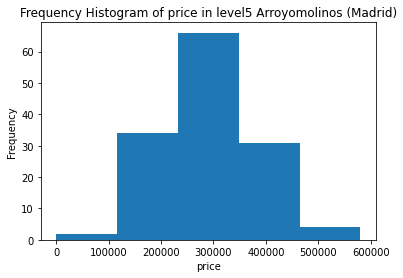

In [22]:

filtro_datos_frame= df_data[df_data["level5"]=="Arroyomolinos (Madrid)"]
#df_precios=filtro_datos_frame.groupby("price").size().reset_index(name='Contador')
#display(df_precios.sort_values(by=['price']))
plt.hist(filtro_datos_frame["price"],bins=5)
plt.gca().set(title='Frequency Histogram of price in level5 Arroyomolinos (Madrid)', ylabel='Frequency', xlabel='price');
###more than 60 in range of [250000,350000] 
###see like normal distribution

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [4]:
filtro_southbelt_frame= df_data[df_data["level5"].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]
display(filtro_southbelt_frame["level5"].head(10))

2      Fuenlabrada
4      Fuenlabrada
86        Alcorcón
95         Leganés
110       Alcorcón
162    Fuenlabrada
170         Getafe
190        Leganés
194        Leganés
215    Fuenlabrada
Name: level5, dtype: object

#### Make a bar plot of the median of prices (★★★) 

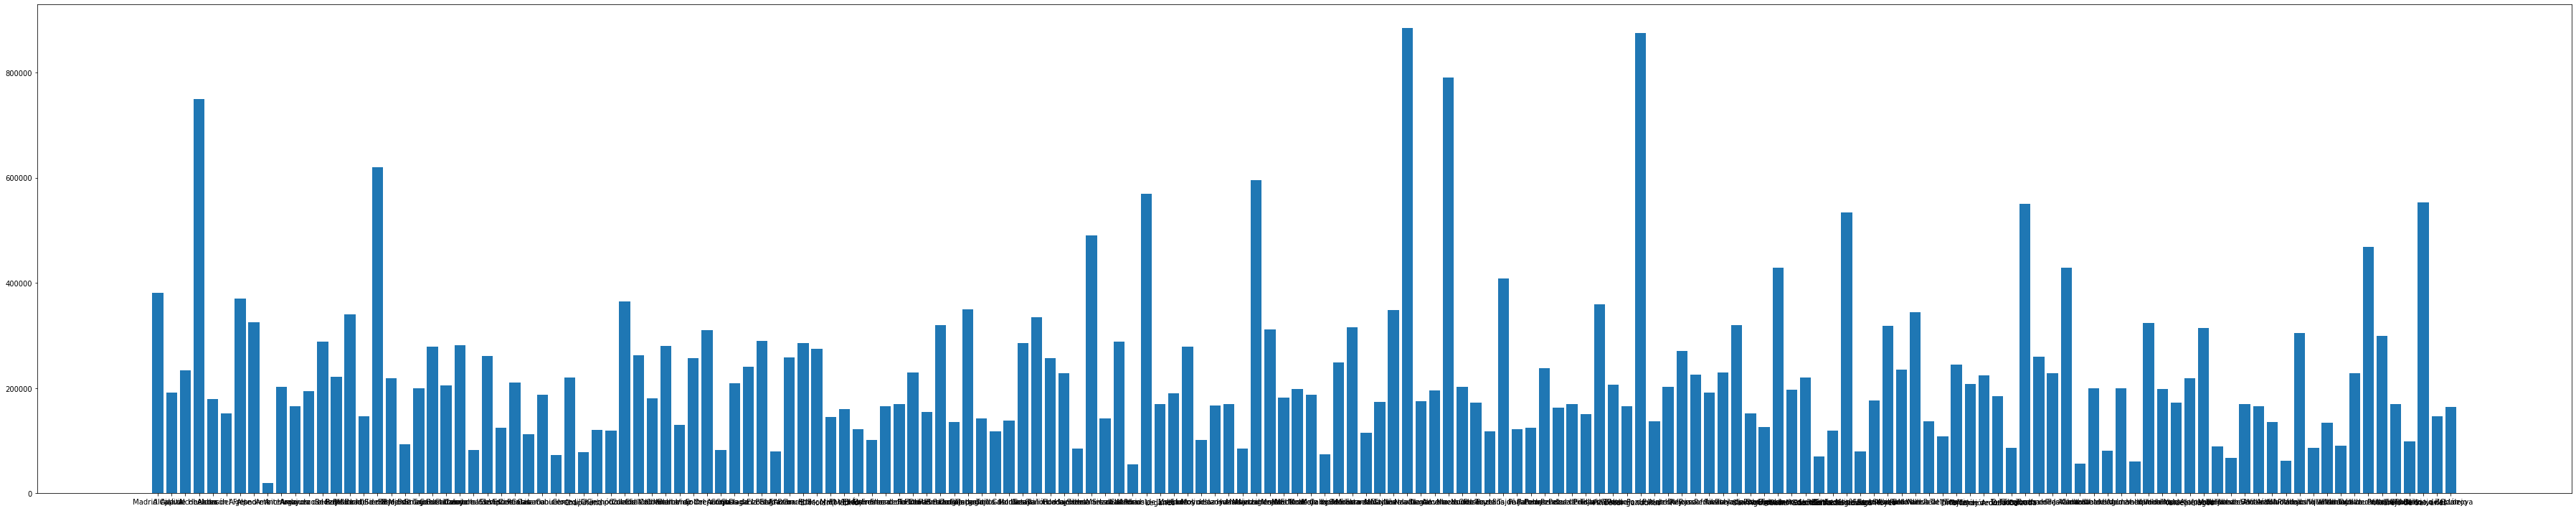

In [7]:
filtro_datos_frame = df_data[['level5', 'price']]
#display(filtro_datos_frame)
grouped_filtro_datos_frame = filtro_datos_frame.groupby('level5')['price'].median().reset_index()
#display(grouped_filtro_datos_frame)


#keys = grouped_filtro_datos_frame.index.values.tolist()
values = grouped_filtro_datos_frame['price'].tolist()
keys = grouped_filtro_datos_frame['level5'].tolist()

plt.rcParams["figure.figsize"] = [50, 10]
plt.rcParams["figure.autolayout"] = True

plt.bar(keys, values)
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [9]:
cal_datos_frame = df_data[['price', 'rooms',"surface","bathrooms"]]
display(cal_datos_frame.mean())
display(cal_datos_frame.std())


price        477303.566417
rooms             3.231611
surface         196.916436
bathrooms         2.150233
dtype: float64

price        591294.231899
rooms             1.393106
surface        2182.758313
bathrooms         1.292079
dtype: float64

#### What is the most expensive home of each population? (★★☆) 

In [8]:
twocol_datos_frame = df_data[['level5', 'price']]
#display(filtro_datos_frame)
max_datos_frame = twocol_datos_frame.groupby('level5')['price'].max().reset_index()
display(max_datos_frame)

,level5,price
0,Madrid Capital,8000000
1,Ajalvir,345000
2,Alcalá de Henares,850000
3,Alcobendas,8000000
4,Alcorcón,950000
...,...,...
163,Villar del Olmo,280000
164,Villarejo de Salvanés,226000
165,Villaviciosa de Odón,1900000
166,Villavieja del Lozoya,260000


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

,price,rooms,surface,bathrooms
2,-1.097758,-0.020921,NaN,-0.837404
4,-1.097758,-0.020921,-0.394416,-0.837404
86,-0.950402,-2.379769,-0.945785,-0.837404
95,0.793312,-0.020921,0.126321,0.485046
110,1.652890,-0.020921,0.463269,1.807495
...,...,...,...,...
15276,-0.696622,-0.020921,-0.516942,-0.837404
15292,0.457668,-0.020921,-0.026837,0.485046
15306,-0.434655,-0.020921,-0.409732,0.485046
15323,-0.909470,-0.020921,-0.317837,-0.837404


(array([[533., 360.,  12.,   2.,   0.],
        [179., 692.,  29.,   2.,   0.],
        [493., 267.,  23.,   1.,   3.],
        [451., 429.,  16.,   1.,   0.]]),
 array([-2.37976937, -0.03452887,  2.31071163,  4.65595212,  7.00119262,
         9.34643312]),
 <a list of 4 BarContainer objects>)

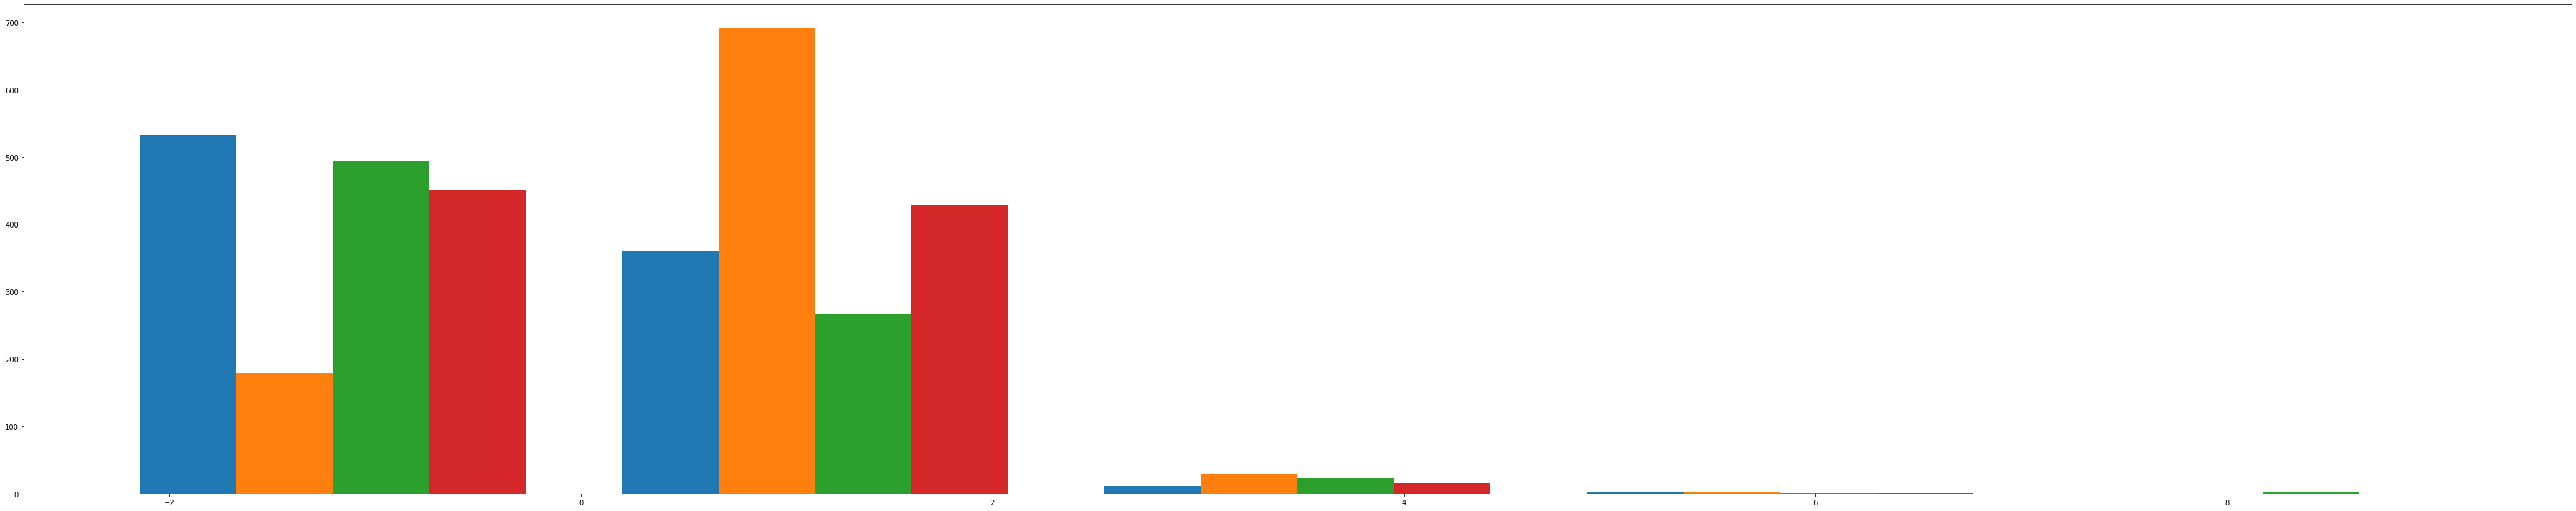

In [12]:
#When normalizing we simply subtract the mean and divide by standard deviation.
southbelt_frame= df_data[df_data["level5"].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])][['price', 'rooms',"surface","bathrooms"]]
normalized_df=(southbelt_frame-southbelt_frame.mean())/southbelt_frame.std()
display(normalized_df)  #value between 0 -1
plt.hist(normalized_df,bins=5)

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [ ]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [10]:
df_compare=df_data[df_data["level5"].isin(["Getafe","Alcorcón"])][['price', "surface","level5"]]
df_compare['pricebymeter']=df_compare['price']/df_compare['surface']
df_compare.groupby('level5')['pricebymeter'].mean().reset_index()
#the price per square metter in Alcorcon are highter than Getafe.

,level5,pricebymeter
0,Alcorcón,2239.302480
1,Getafe,2066.314949


#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [11]:
df_compare=df_data[df_data["level5"].isin(["Valdemorillo","Galapagar"])][['price', "surface","level5"]]
df_compare.groupby('level5')['price'].mean().reset_index()
#no, but very similar 3797 mean by house

,level5,price
0,Galapagar,360063.202381
1,Valdemorillo,363860.293103


#### What happens if we do the same analysis for price/m2 (★★☆) 

In [4]:
df_compare2=df_data[df_data["level5"].isin(["Valdemorillo","Galapagar"])][['price', "surface","level5"]]
df_compare2['pricebymeter']=df_compare2['price']/df_compare2['surface']
df_compare2.groupby('level5')['pricebymeter'].mean().reset_index()
#the price per square metter in Galapagar are highter than Valdemorillo. 300 per m2

,level5,pricebymeter
0,Galapagar,1606.324030
1,Valdemorillo,1317.950211


#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

,price,surface,level5,pricebymeter
391,160000,85.0,Valdemorillo,1882.352941
546,749000,426.0,Valdemorillo,1758.215962
577,798500,575.0,Galapagar,1388.695652
618,420000,400.0,Galapagar,1050.000000
732,660000,525.0,Galapagar,1257.142857
...,...,...,...,...
14851,415000,291.0,Galapagar,1426.116838
14888,312000,433.0,Valdemorillo,720.554273
14912,530000,NaN,Valdemorillo,NaN
14914,275000,161.0,Valdemorillo,1708.074534


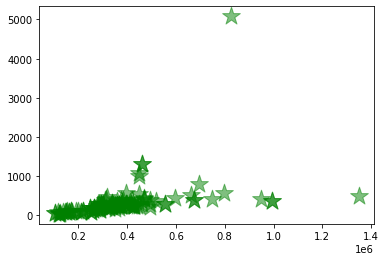

In [5]:
display(df_compare2)
plt.scatter(df_compare2['price'],df_compare2['surface'],color = 'green', marker = '*', alpha = 0.5,
            s = 350)
plt.show()
#perhaps linear relation

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

Text(0.5, 0, 'Alcorcón')

<Figure size 7200x7200 with 0 Axes>

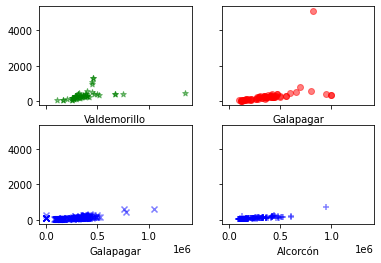

In [26]:
df_compare4=df_data[df_data["level5"].isin(["Valdemorillo","Galapagar","Getafe","Alcorcón"])][['price', "surface","level5"]]
df_compare4['pricebymeter']=df_compare4['price']/df_compare4['surface']
#display(df_compare4.head(20))

f = plt.figure(figsize=(100,100))    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)

data_loc1=df_compare4[df_compare4["level5"]=="Valdemorillo"]
axes[0][0].scatter(data_loc1['price'],data_loc1['surface'],color = 'green', marker = '*', alpha =0.5)
axes[0][0].set_xlabel('Valdemorillo', labelpad = 5)
#axes[0][0].set(xlim=(0, 1))
#display(data_loc1.head(20))

data_loc2=df_compare4[df_compare4["level5"]=="Galapagar"]
axes[0][1].scatter(data_loc2['price'],data_loc2['surface'],color = 'red', marker = 'o', alpha = 0.5)
#axes[0][1].set(xlim=(0, 1))
axes[0][1].set_xlabel('Galapagar', labelpad = 5)

data_loc3=df_compare4[df_compare4["level5"]=="Getafe"]
axes[1][0].scatter(data_loc3['price'],data_loc3['surface'],color = 'blue', marker = 'x', alpha = 0.5)
#axes[1][0].set(xlim=(0, 1))
axes[1][0].set_xlabel('Galapagar', labelpad = 5)

data_loc4=df_compare4[df_compare4["level5"]=="Alcorcón"]
axes[1][1].scatter(data_loc4['price'],data_loc4['surface'],color = 'blue', marker = '+', alpha = 0.5)
#axes[1][1].set(xlim=(0, 1))
axes[1][1].set_xlabel('Alcorcón', labelpad = 5)




#### How many  real estate agencies the dataset contains? (★★☆) 

In [47]:

agencies_datos_frame = df_data[['realEstate_name']]
display(agencies_datos_frame.head(10))
agency_frame = agencies_datos_frame.groupby('realEstate_name')['realEstate_name'].unique().count()
display("Amount of Agency:",agency_frame)


,realEstate_name
1,ferrari 57 inmobiliaria
2,tecnocasa fuenlabrada ferrocarril
3,look find boadilla
4,tecnocasa fuenlabrada ferrocarril
5,ferrari 57 inmobiliaria
6,expimad
7,expimad
8,expimad
9,expimad
10,modesta


'Agency:'

1821

"\n# count_datos_frame = mosth_datos_frame.groupby('level5')['level5'].count().reset_index(name='count')\ndisplay(count_datos_frame.head(10))\n#display the location with most houses\ndisplay(count_datos_frame[count_datos_frame['count']==count_datos_frame['count'].max()])\n"

#### What is the population (level 5) that contains the most houses? (★★☆) 

In [42]:
mosth_datos_frame = df_data[['level5', 'price']]
#display(filtro_datos_frame)
count_datos_frame = mosth_datos_frame.groupby('level5')['level5'].count().reset_index(name='count')
display(count_datos_frame.head(10))
#display the location with most houses
display(count_datos_frame[count_datos_frame['count']==count_datos_frame['count'].max()])

,level5,count
0,Madrid Capital,6643
1,Ajalvir,17
2,Alcalá de Henares,525
3,Alcobendas,259
4,Alcorcón,190
5,Aldea del Fresno,12
6,Algete,43
7,Alpedrete,60
8,Ambite,1
9,Anchuelo,2


,level5,count
0,Madrid Capital,6643
